# Drawing rectangles and semicircles

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt


## Define functions for the geometry

In [2]:
def background(sheet_dimension):
    """
    create the background
    parameters:
    int
    dimension of the background
    """
    back = np.zeros((sheet_dimension,sheet_dimension))
    return back

def rectangle(x,y):
    """
    create a rectangle
    parameters:
    int
    height and lenght
    """
    return np.ones((y,x))

def circle(radius_out, radius_in = 0, background_color = 0):
    """
    create a circle
    parameters:
    int outer radius
    inner radius

    optional:
    background color, which means you have to put the number you want to have
    that then matplot will transform into a color 
    """
    x = np.linspace(-radius_out,radius_out, 2*radius_out)
    y = np.linspace(-radius_out,radius_out, 2*radius_out)
    A = background_color * np.ones((2*radius_out,2*radius_out))
    for i in x[:-1]:
        for j in y[:-1]:
            r = np.sqrt(i**2+j**2)
            if r < radius_out and r >= radius_in:  
                A[radius_out+int(i),radius_out+int(j)] = 1
    figure = A
    return figure


def ellipse(a_max, b_max, a_min = 0, b_min = 0,background_color = 0):
    """
    create an ellipse
    parameters:
    int
    inner and outer b and a axies

    optional:
    background color, which means you have to put the number you want to have
    that then matplot will transform into a color 
    """
    x = np.linspace(-a_max,a_max, num = 2*a_max)
    y = np.linspace(-b_max,b_max, num = 2*b_max)
    A = background_color * np.ones((2*a_max,2*b_max))

    for i in x[:-1]:
        for j in y[:-1]:
            r_max = np.sqrt(i**2/a_max**2+j**2/b_max**2)
            r_min = np.sqrt(i**2/a_min**2+j**2/b_min**2)
            if r_max < 1 and r_min > 1:  
                A[a_max+int(i),b_max+int(j)] = 1
    figure = A
    return figure

## Define a way to appy the figure to the picture

In [3]:
def apply_figure(background, figure_to_apply, x_coordinate = 0, y_coordinate = 0):
    """
    put the figure tou created in the background

    parameters:
    background = matrix
    figure_to_apply = matrix

    optional:
    int
    put the coordinates of the center of your figure

    """
    N = int(np.size(background[:,0]))
    a = int(np.size(figure_to_apply[:,0])/2)
    b = int(np.size(figure_to_apply[0,:])/2)

    x_start = int(N/2 + x_coordinate)
    y_start = int(N/2 + y_coordinate)

    background[(y_start-a):(y_start+a),(x_start-b):(x_start+b)] = figure_to_apply
    new_figure = background
    return new_figure

## Creating the background

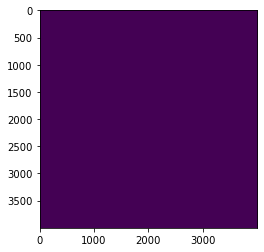

In [4]:
background_dimension = 4000
back = background(background_dimension)

figure, axes = plt.subplots()
axes.imshow(back)
plt.show()

## Central holder

In [5]:
length_a = 2500
length_b = 2500
radius = 200

color_1 = 0.1

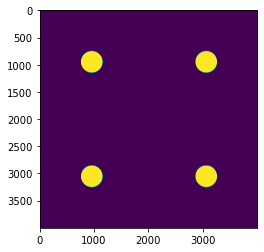

In [6]:
cir = color_1*circle(radius)

for i in [-1,1]:
    for j in [-1,1]:
        picture = apply_figure(back,cir,i*length_b/2-i*radius,j*length_a/2-j*radius)

figure, axes = plt.subplots()
axes.imshow(picture)
plt.show()


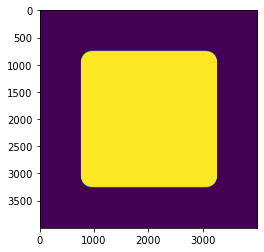

In [7]:
central_rect = color_1*rectangle(length_b-2*radius,length_a-2*radius)
orizontal = color_1*rectangle(length_b-2*radius,radius)
vertical = color_1*rectangle(radius,length_a-2*radius)

picture = apply_figure(back, central_rect,0,0)
picture = apply_figure(back,orizontal,0,length_a/2-radius/2)
picture = apply_figure(back,orizontal,0,-length_a/2+radius/2)
picture = apply_figure(back,vertical,length_b/2-radius/2,0)
picture = apply_figure(back,vertical,-length_b/2+radius/2,0)

figure, axes = plt.subplots()
axes.imshow(picture)
plt.show()


## From now on we use the same pricitple to create the entire circuit

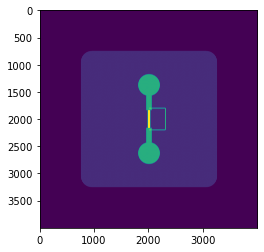

In [8]:
#### create various parts of the circuit ####
#central gate
color_2 = 0.5
rad_gate = 200
circle_gate = color_2*circle(rad_gate,0,color_1/color_2)
picture = apply_figure(back,circle_gate,0,-length_a/4)
picture = apply_figure(back,circle_gate,0,+length_a/4)

h = 300
t = 100
vertical_rect_gate = color_2*rectangle(t,h)
picture = apply_figure(back,vertical_rect_gate,0,-length_a/8)
picture = apply_figure(back,vertical_rect_gate,0,+length_a/8)

#connection 
color_3 = 0.8
h = 330
t = 50 
conn = color_3*rectangle(t,h)
picture = apply_figure(back,conn,0,0)

#lateral connector
color_4 = 0.7
h = 400
t = 10
lateral_con = color_4*rectangle(t,h)
oriz_con = color_4*rectangle(300,10)
picture = apply_figure(back,lateral_con,300,0)

picture = apply_figure(back,oriz_con,150,200)
picture = apply_figure(back,oriz_con,150,-200)


figure, axes = plt.subplots()
axes.imshow(picture)
plt.show()

## Apply the final parts

<ipython-input-2-b7c143a02034>:61: RuntimeWarning: divide by zero encountered in double_scalars
  r_min = np.sqrt(i**2/a_min**2+j**2/b_min**2)


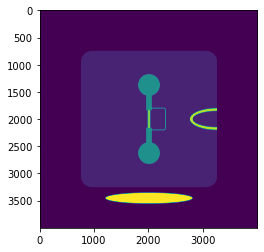

In [9]:
quarter_circle_down = color_4*circle(30,19,color_1/color_4)[:30,30:]
quarter_circle_up = color_4*circle(30,19,color_1/color_4)[30:,30:]
picture = apply_figure(back,quarter_circle_down,290,-190)
picture = apply_figure(back,quarter_circle_up,290,190)

#right ellipse
color_5 = 0.9
b_max = 500
b_min = 450
a_max = 200
a_min = 150
ell = color_5*ellipse(a_max,b_max,a_min,b_min, color_1/color_5)[:,:int(b_max)]
picture = apply_figure(back,ell, length_a/2-b_max/2,0)

#bottom ellipse
color_6 = 1
b_max = 800
a_max = 100
ell_bottom = color_6*ellipse(a_max,b_max,0,0,0)
picture = apply_figure(back,ell_bottom,0,length_a/2 + 200)

figure, axes = plt.subplots()
axes.imshow(picture)
plt.show()